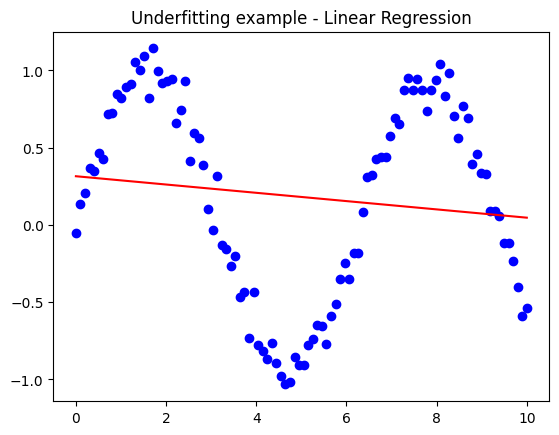

MSE: 0.40815674248189054
R2 score: 0.01477064551875884


In [4]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
x=np.linspace(0,10,100).reshape(-1,1)
y=np.sin(x)+ np.random.normal(0,0.1, size=x.shape)


model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

plt.scatter(x,y,color="blue")
plt.plot(x,y_pred, color="red")
plt.title("Underfitting example - Linear Regression")
plt.show()

print("MSE:", mean_squared_error(y, y_pred))
print("R2 score:", r2_score(y, y_pred))

# OVERFITTING - Model ortiqcha moslashadi

In [5]:
# overfittingda model training malumotlarini juda yaxshi organadi, lekin yangi ma'lumotlar kelganda yaxshi ishlamaydi

In [4]:
# ushbu vaziyatda model noislarni ham qo'shib organib oladi

# belgilar:


In [7]:
# belgilari 
#   1) training xatoligi juda past
#    2) test xatoligi juda yuqori


# Kelib chiqish sabablari

1) model juda murakkab algaritm bilan ishlangan
2) trainingda malumot juda kam bolgan
3) juda kop featureslar bolgan yoki yuqori darajali qiyin malumotlar 

# Overfitting turlari
# 1) HIGH Variance - model malumotga juda moslashgan 
# 2) complex model - cuqur neural network, random forest lar bilan ishlangan
# 3) too many features - irrelevent feature bilan model shovqinni o'rgangan


MSE: 0.0324150925759856
R2 score: 0.9217548127714564


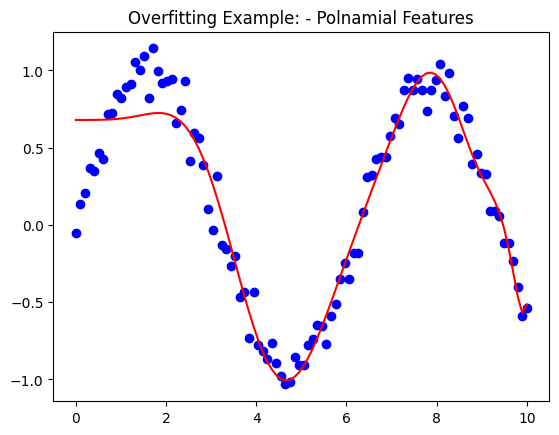

In [5]:
poly = PolynomialFeatures(degree=15)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)

plt.scatter(x,y, color="blue")
plt.plot(x,y_pred, color="red")
plt.title("Overfitting Example: - Polnamial Features")



print("MSE:", mean_squared_error(y, y_pred))
print("R2 score:", r2_score(y, y_pred))

| Parametr | Underfitting | Overfitting |
|---|---|---|
| Treningdagi xatolik | Yuqori | Juda past |
| Testdagi xatolik | Yuqori | Yuqori |
| Sababi | Model juda oddiy | Model juda murakkab |
| Belgisi | Naqshlarni o'rganmaydi | Shovqinni ham o'rganadi |
| Yechimi | Modelni kuchaytirish, features qo'shish | Regularization, ko'proq ma'lumot |

# Overfitting va Underfittingni kamaytirish usullari

Underfitting kamaytirish
1) model murakkabligini oshirish (linear.. polynomial, simple NN, Deep NN)
2) qoshimcha features qoshish
3) training malumotlarini kengaytirish

Overfitting kamaytirish 
1) Regularization L1, L2, Ridge, Lassolarni ishlatish 
2) Training malumotlarini kopaytirish(Data Augmentation)
3) Model murakkabligini kamaytirish 
4) cross validationni ishlatish 

# Rigde regression bilan Overfittingni Kamaytirish

MSE: 0.0324150925759856
R2 score: 0.9217548127714564


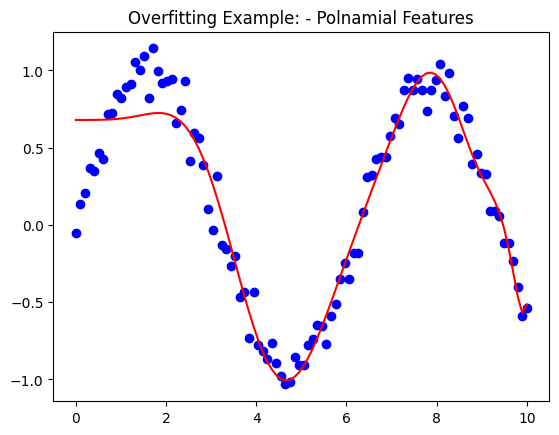

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)

plt.scatter(x,y, color="blue")
plt.plot(x,y_pred, color="red")
plt.title("Overfitting Example: - Polnamial Features")



print("MSE:", mean_squared_error(y, y_pred))
print("R2 score:", r2_score(y, y_pred))

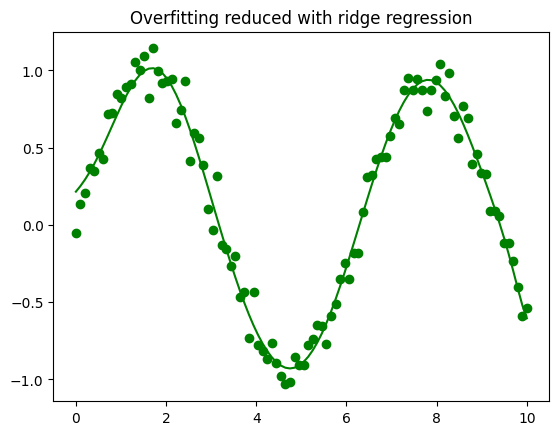

In [8]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_poly, y)
y_pred_ridge = ridge_model.predict(x_poly)

plt.scatter(x,y,color="green")
plt.plot(x,y_pred_ridge, color="green")
plt.title("Overfitting reduced with ridge regression")
plt.show()

# Vizualizatsiya orqali tushunish

1) Underfitting - har ikkala curve yuqori
2) overfitting  - training errori past, test errori yuqori

c:\Users\Jahongir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Jahongir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Jahongir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Jahongir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365:

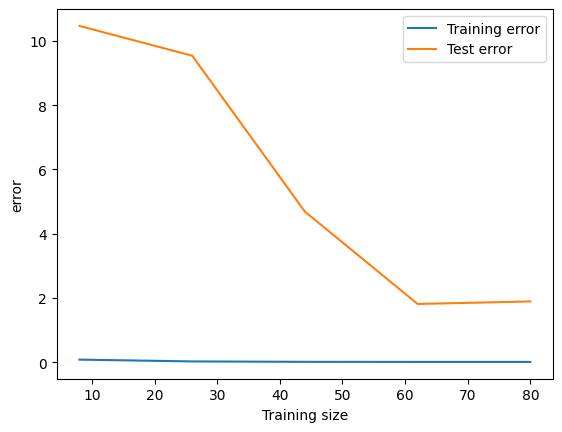

In [9]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

train_size, train_scores, test_scores = learning_curve(model, x, y, cv=5)

plt.plot(train_size, 1-train_scores.mean(axis=1), label="Training error")
plt.plot(train_size, 1-test_scores.mean(axis=1), label="Test error")
plt.xlabel("Training size")
plt.ylabel("error")
plt.legend()
plt.show()

# Regularization -- modelni haddan tashqari murakkablashib ketishidan saqlaydi

# regularization turlari mavjud 
1) L1 Regularization (Lasso Regression)
2) L2 Regularization (Ridge Regression)
3) ElasticNet(L1+L2)

# Ridge Regression bu L2 regularization bo'lib vaznlarni kvadratiga jarima qollaydi

# L2 multicollinearity xolatlarda // model high variance bolsa // featurelar kop bo'lsa ishlatiladi

In [10]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
np.random.seed(42)
x=np.random.rand(200,10)
y=3*x[:,0]+5*x[:,1]+np.random.randn(200)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
ridge=Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("Weights:", ridge.coef_)

MSE: 0.923191520942326
Weights: [ 3.02116607  4.36243179 -0.07624928 -0.0429577   0.18664931  0.19312283
 -0.10704079 -0.60461366 -0.32931654  0.1860876 ]


# L1 - Lasso Regression -- regularization vaznlarni mutlaq qiymatiga jarima qollaydi

In [11]:
from sklearn.linear_model import Lasso 


lasso=Lasso(alpha=0.1)
lasso.fit(x_train, y_train)


print("MSE:", mean_squared_error(y_test, lasso.predict(x_test)))
print("Weights:", lasso.coef_)

MSE: 1.1379199832234455
Weights: [ 2.20758864  3.52785664  0.          0.          0.          0.
 -0.         -0.         -0.          0.        ]


In [ ]:
# kopchilik qiymatlar (weights lar) 0 bo'ladi chunki feature selection avtomatik

# Elastic Net bunda L1 va L2 lar qoshiladi ikkita regularizationni birlashtirib ishlaydi

In [12]:
from sklearn.linear_model import ElasticNet 


elas=ElasticNet(alpha=0.1, l1_ratio=0.5)
elas.fit(x_train, y_train)


print("MSE:", mean_squared_error(y_test, elas.predict(x_test)))
print("Weights:", elas.coef_)

MSE: 1.510113115137184
Weights: [ 1.77760922  2.58732876  0.          0.          0.          0.
 -0.         -0.         -0.          0.        ]


# L1 vs L2 – Farqi

| Xususiyat | L1 (Lasso) | L2 (Ridge) | | |
|---|---|---|---|---|
| Jarima turi | | w | | w² |
| Weightlarni 0 ga aylantiradı | ✓ Ha | ✗ Yo'q | | |
| Feature selection | ✓ Kuchli | ✗ Qilmaydi | | |
| Shoqinli ma'lumotlarda | Yaxshi emas | ✓ Eng Yaxshi | | |
| Katta datasetda | O'rtacha | ✓ Juda yaxshi | | |

# Data Augmentation - bu train ma'lumotlarini kopaytirish va bu orqali overfittingni kamaytirish 

In [ ]:
# asosan NLP, Computer vision, audio preprocessinglarda kop ishlatiladi

In [ ]:
# SMOTE 

from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_res, y_res = sm.fit_resample(x, y)


# Data Augmentation turlari 

In [15]:
# 1) Rotate 
# 2) Zoom
# 3) Flip
# 4) Shift
# 5) Brightness
# 6)nois qoshish 

In [16]:
# Rotate qoshish - bunda model obyektning qaysi burchagida joylashganidan qat'iy nazar uni tanib olishni o'rganadi

In [17]:
# quyidagi vazifalarda ishlatiladi
#1) yuzni aniqlash 
#2) obyekt detektatsiyasi 
#3) tibbiy tasvirlar

In [ ]:
# kodi (TenserFlow Keras)

from tensorflow.keras.preprosessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    ratation_range = 30                # rasmni -30 dan +30 gradusgacha ogiradi    
)

In [ ]:
# ZOOM qilish -- model obyektning turli kattaliklarda ko'rinishini o'rganadi 

datagen=ImageDataGenerator(
    zoom_range = 0.2                    # 20 % ga zoomni in//out qiladi
)

In [ ]:
# FLIP qilish -- bu ikki xil bo'ladi 
# 1-horizontal flip(chapdan onnga) va 2-vertical flip(yuqoridan pastga)

In [ ]:

from tensorflow.keras.preprosessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = False                 # tibbiy tasvirlarda extiyot bo'lish kerak
    )

In [20]:
# Shift -- siljitish ikki xil turi mavjud 1) width_shift_range(chapdan o'ngga) 2-turi height_shift_range(yuqoridan pastga)

In [ ]:
from tensorflow.keras.preprosessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    width_shift_range = 0.2,
    height_shift_range = 0.2
    )

In [ ]:
# brightness (yorqinlikni o'zgartirish) -- model yoruglik ozgarsa ham obyektni tanisin

In [ ]:
from tensorflow.keras.preprosessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    bightness_range = [0.5,1.5]             # qorongu juda yaqin
)

In [21]:
# nois qoshish -- shovqinli joylari buzilgan yoki kam sifatli tasvirlarda obyektni tanish 

# nois turlari mavjud 

# 1) Guassian nois
# 2) Salt va pepper mois
# 3) Speckle noise 

In [ ]:
import torchvision.transform as transform
import torch 
import numpy as np 

class AddGuassianNoise(object):
    def __init__(self, mean=0, std=0.1):
        self.mean=mean
        self.std = std

    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size())*self.std+self.mean
transform=transform.compose([
    transform.ToTensor(),
    AddGuassianNoise(0,0.1)
])

# L2 da ishlatiladigan multicallinearityning tarifi - agarda datasetdagi featurelar juda kuchli corelyatsiya (0.8 dan 0.95 gacha) bogliqlik bolsa manashu xolatga aytiladi 

# multicollinearity ni qanday aniqlash mumkin 

# 1-usul -- karelyatsiya matritsa yordamida 

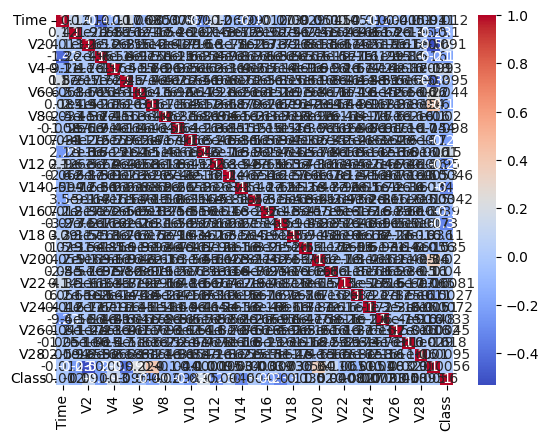

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\Jahongir\desktop\practise\Data\Row_Data\creditcard.csv")
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show( )

# ushbu xolatni qanday yechish mumkin

1) kuchsiz yoki takrorlanuvchi featurelarni o'chirish
2) PCA -- dimensions reduction
3) L2 regularization orqali taxslash 
4) Onehot encoding qilish 